# Анализ успешности компьютерных игр

**Задача:** изучить данные комьютерных игр из открытых источников

**Цель:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Данные:** данные собраны из открытых источников за период 1980 - 2016 года

**Исследование:** 
- определим жизненный цикл платформ на основании исходных данных
- определим период данных для анализа
- выясним влияние наличия рейтингов на продажи
- выясним самые продаваемые жанры, успешные платформы
- определим влияние региона на продажи

## Обзор данных

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from scipy import stats as st

In [27]:
# открываем датасет для изучения

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:\\Users\e-kam\OneDrive\Рабочий стол\Яндекс_data_science\проекты\1_Общий проект')
    
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [28]:
# функции info() показывает отсутствие большого кол-ва данных, необходимость доработать названия колонок, преобразовать типы данных.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


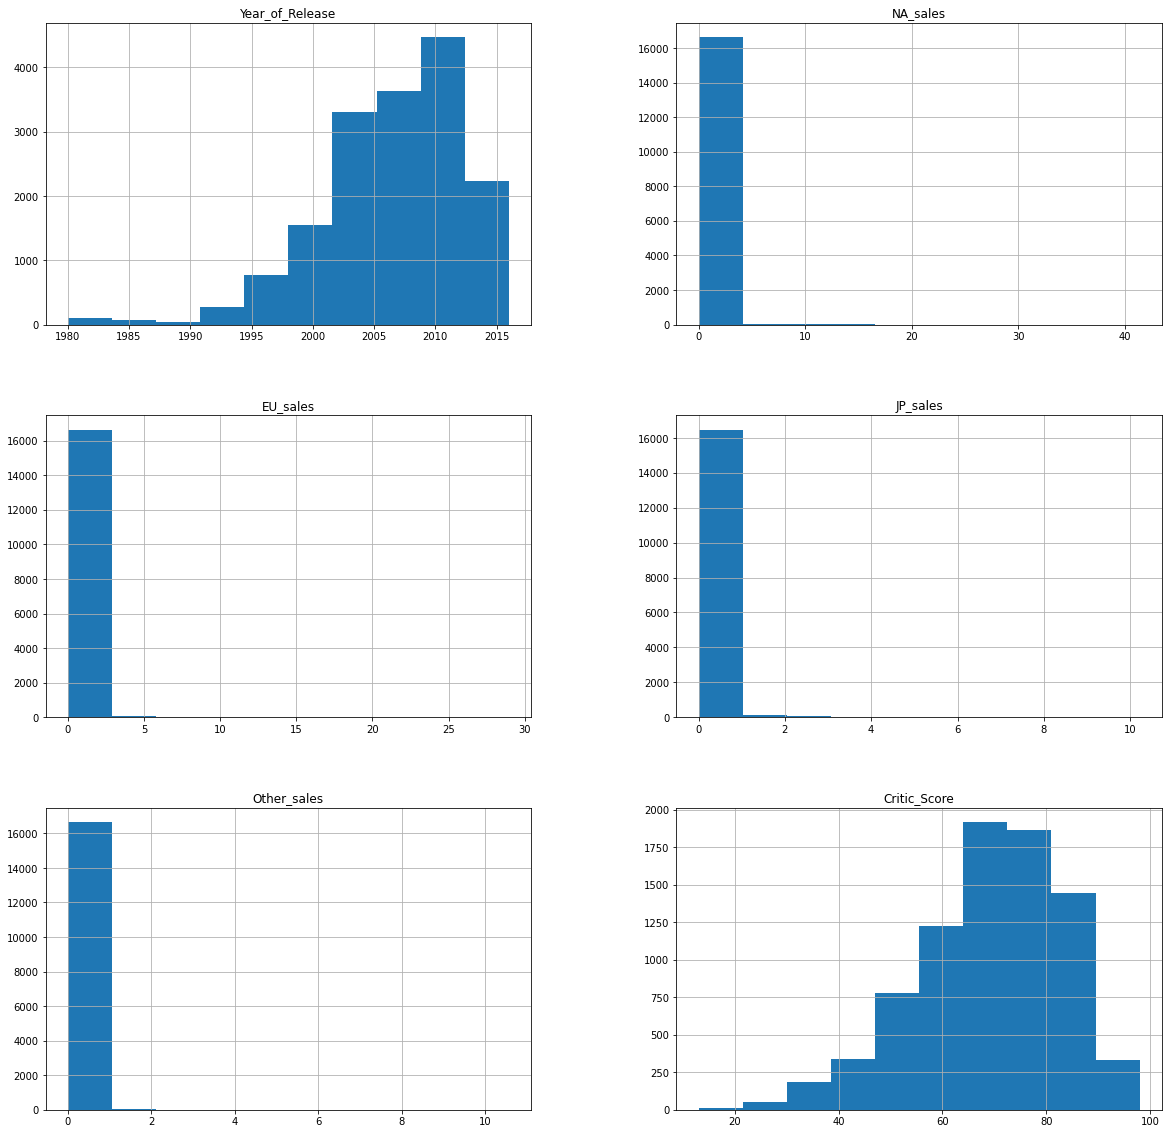

In [29]:
# построим диаграммы для наглядности данных

data.hist(figsize=(20, 20));

# далее при изучении необходимо будет верно выставить диапазон для анализа, т..к сейчас диаграммы неинформативны

In [30]:
# проверим статистические данные количественных показателей

data.describe()

# более чем у четверти данных (продажи, рейтинги) отсутствуют значения

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

Обзор данных показал, что в исходных данных содержится большое кол-во пропусков в продажах и более 40% пропусков в рейтингах (3 колонки). В ходе работы необходимо заменить пропуски значениями, т..е присвоить им некоторую категорию, чтоб была возможность проводить с данными анализ.
В названиях колонок наблюдается верхний регистр, названия необходимо перевести в нижний регистр для простоты работы с кодом. В данных необходимо заменить тип данных: User_Score переведем в float, Year_of_Release и Critic_Score переведем int

## Предобработка данных

### Название колонок

In [31]:
# укажем название колок в нижнем регистре

data.columns = map(str.lower, data.columns)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [32]:
# проверим наличие дубликатов в данных

data[data.duplicated()].head() # дубликатов в датасете нет

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Обработка пропусков

In [33]:
data.isna().sum() #найдем пропуски в данных

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [34]:
# выведем долю пропусков

round(data.isna().sum() / len(data), 2)

# name - пропуски даже не отражаются в долях, поэтому спокойно удаляем эти данные и не тратим на них время. 
# year_of_release -  2% слишком малое значение, поэтому так же удаляем из датасета

name               0.00
platform           0.00
year_of_release    0.02
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score       0.51
user_score         0.40
rating             0.40
dtype: float64

In [35]:
 # удаляем все пропуски по колонке name и year_of_release
    
data = data.dropna(subset=['name', 'year_of_release'])

data.info() # Проверим. Данных стало  меньше - 16444

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [36]:
# переведем сразу года в тип данных int

data['year_of_release'] = data['year_of_release'].astype('int')

Изучим колонки рейтингов. Ранее мы наблюдали большое кол-во пропусков в 3-х колонках с рейтингами

Проверим рейтинг от организации ESRB:
- EC «Для детей младшего возраста 
- E «Для всех» 
- E10+ «Для всех от 10 лет и старше»: 
- T «Подросткам» 
- M «Для взрослых» 
- AO «Только для взрослых»: 
- RP «Рейтинг ожидается» 
- K-A неопределен

In [37]:
# посчитаем кол-во значений для каждой категории
data.groupby('rating')['rating'].count() # в основном преоблажают категории Е и Т, затем E10+ и М, около 40% с неизвестный возрастной категорией


rating
AO         1
E       3921
E10+    1393
EC         8
K-A        3
M       1536
RP         1
T       2905
Name: rating, dtype: int64

In [38]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [39]:
# кол-во пропусков в колонках 'user_score' и 'rating' практически совпадают. Проверим одинаковые ли это строчки

data[(data['user_score'].isna()) & (data['rating'].isna())] #пропуски в рейтингах user_score и rating практически совпадают из 6605 совпало 6543, отличие не более 1%  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [40]:
# по той же аналогии проверим 3 рейтинга одновременно

data[(data['critic_score'].isna()) & (data['user_score'].isna()) & (data['rating'].isna())]

# практически 99% совпадений пропусков по 3-м рейтингам (если считать по рейтингу с минимальным пропуском user_score)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [41]:
# проверим уникальные значения рейтингов
print(data['critic_score'].sort_values().unique())
print(data['user_score'].sort_values().unique())
print(data['rating'].sort_values().unique())

# уникальные значения сходятся с вводными по данным. 


[13. 17. 19. 20. 21. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]
['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]
['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]


In [42]:
# в рейтинге 'user_score' наблидается 0 значение, проверим какое количеcтво имеется. Т.к. тип данных пока object, вызываем '0'

data.loc[data['user_score']=='0'] # обнаружено одно значение


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


In [43]:
# в исходных данных имеется всего одно нулевое значение.
# поэтому все Nan мы можем заменить на 0 значения, и в дальнейшем, при необходимости, исключить нулевые данные из анализа без потери чистоты анализа
data['user_score'] = data['user_score'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(0)
data['rating'] = data['rating'].fillna('неизвестно') # тип данных object, поэтому нет привязки к числовому значению

In [44]:
# проверим долю 'user_score'

round(data['user_score'].value_counts() / len(data), 4).tail()

# значений с низкой долей очень большое. Удалять не будем, чтоб не потерять данные других колонок, а объединить нет возможности, 
# т.к. не обнаружен общий признак, по которому можно сгруппировать данные

0.2    0.0001
0.9    0.0001
9.6    0.0001
0      0.0001
9.7    0.0001
Name: user_score, dtype: float64

In [45]:
# проверим долю 'critic_score'

round(data['critic_score'].value_counts() / len(data), 4).tail()

# значений с низкой долей много. Удалять не будем, чтоб не потерять данные других колонок, а объединить нет возможности, 
# т.к. не обнаружен общий признак, по которому можно сгруппировать данные

20.0    0.0002
29.0    0.0002
21.0    0.0001
17.0    0.0001
13.0    0.0001
Name: critic_score, dtype: float64

In [46]:
# проверим долю 'rating'

round(data['rating'].value_counts() / len(data), 4).head(15)

# значений с низкой долей много. Удалять не будем, чтоб не потерять данные других колонок, а объединять не вижу смысл, 
# т..к данные значения в небольшом кол-ве и не должны повлиять на анализ

неизвестно    0.4060
E             0.2384
T             0.1767
M             0.0934
E10+          0.0847
EC            0.0005
K-A           0.0002
AO            0.0001
RP            0.0001
Name: rating, dtype: float64

In [49]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0,неизвестно
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,неизвестно
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0,неизвестно
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0,неизвестно
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0,неизвестно
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0,неизвестно


In [50]:
# сразу переведем знаяения 'critic_score' в int
data['critic_score'] = data['critic_score'].astype('int')

In [51]:
data.info()
# всего осталось 16444 позиций. Все пропуски заполнены, тип данных указан верно

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


In [52]:
# посмотрим закономерности пропуском и попробуем определить причины их появления
# т.к. многие пропуски совпадали в рейтингах, можем проверить один из рейтингов

data.loc[data['user_score']==0].groupby('genre')['genre'].count() 
# по жанрам закономерность не обнаружена

data.loc[data['user_score']==0].groupby('rating')['rating'].count() 
# как ранее и указывали, пропуски у категорий совпадают, поэтому основное кол-во совпало с пропусками в rating. Более выводов не сделать

data.loc[data['user_score']==0].groupby('year_of_release')['year_of_release'].count() 
#наблюдается увеличение пропусков с 1994 по 2011год, далее идет спад. 
#Возможно было выпущено огромное разнообразие игр, поэтому многие игры геймеры обошли вниманием или возможно в этот период была не развита система рейтингов


year_of_release
1980      9
1981     46
1982     36
1983     17
1984     14
1985     13
1986     21
1987     16
1988     14
1989     17
1990     16
1991     41
1992     42
1993     60
1994    120
1995    219
1996    255
1997    270
1998    348
1999    299
2000    200
2001    143
2002    173
2003    164
2004    166
2005    235
2006    330
2007    376
2008    440
2009    407
2010    457
2011    418
2012    290
2013    225
2014    231
2015    271
2016    206
Name: year_of_release, dtype: int64

In [53]:
# осталось разобраться с tbd в колонке user_score 
# TBD — сокращение от To Be Determined. Служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.
# данных с таким значением - 2376шт, это практически 15% всех данных и это много

data.loc[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0,tbd,E


In [54]:
# посмотрим имеется ли закономерность значений 'tbd'

data.loc[data['user_score']=='tbd'].groupby('genre')['genre'].count() 
# закономерности в жанре не обнаружено, они различные с разным процентным соотношением

data.loc[data['user_score']=='tbd'].groupby('year_of_release')['year_of_release'].count() 
#основная масса 'tbd' была с 2000 по 2011 год. Возможно это может быть связано с некорректной оценкой пользователя/геймера

data.loc[data['user_score']=='tbd'].groupby('rating')['rating'].count() 
# почти 65% составляют универсальные игры, т.е из категории Для всех


rating
E             1548
E10+           360
EC               7
M               42
T              369
неизвестно      50
Name: rating, dtype: int64

In [55]:
# нам необходима данная колонка user_score для дальнейшего анализа количественных данных, поэтому данные необходимо заполнить числовым значением.
# в связи с тем, что мы не смогли выявить явной закономерности, то оптимально считать, что у признака tbd нет рейтинга, т.е. укажем 0, как и в Nan ранее. 
# но чтоб данные не повлияли на чистоту анализа, необходимо в дальнейшем отфильтровывать все нулевые рейтинги из анализа 

def user_score(score):
    if score == 'tbd':
        return 0
    elif score != 'tbd':
        return score
data['user_score'] = data['user_score'].apply(user_score)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,неизвестно
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,неизвестно


In [57]:
# проверим верное ли количество нулевых данных стало 8981 позиций. Все верно!

data.loc[data['user_score']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,неизвестно
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,неизвестно
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0,неизвестно
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0,неизвестно
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,0,неизвестно
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0,неизвестно
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0,неизвестно
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,неизвестно
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0,неизвестно


In [58]:
# Проверим и поменяем тип данных user_score на float

data['user_score'] = data['user_score'].astype('float')

In [59]:
# проверим, внесены ли все наши исправления
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Создание колонки с суммой продаж

In [60]:
# для дальнейшего анализа создадим столбец с суммой всех продаж

data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,неизвестно,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,неизвестно,31.38


### Вывод  
В датасете очень много пропусков в данных райтингов. Отсутствие рейтингов в 3-х колонках, практически полностью совпадают  между собой. Большое кол-во отсутствующих данных в рейтингах замечается в период 1995-2011 года, возможно это может быть связано с выходом большого кол-ва и разнообразных игр и не все игры в итоге были оценены геймерами или ассоциациями. Но, т.к. отсутствие данных совпадает по всем рейтингам, предположу, что это может быть связано с техническими сложностями, которые привели к потере части информации. Также категория tbd в рейтинге user_score (около 15%) могла возникнуть в следствии некорректного ввода оценки пользователем/геймером.

Имеющиеся пропуски были заменены на 0, чтоб была возможность строить диаграммы и проводить анализ. При необходимости все нулевые значения для анализа в дальнейшем будем отфильтровывать. Заменять данные медианным или средним значением не релевантно, т.к. пропусков большое кол-во и это исказит данные анализа.

Поиск дублированых данных не привел к их наличию.

В данных были заменены типы данных для возможности проведения в дальнейшем анализа, в основном правки касались рейтингов, т..к по ним мы будем проводить количественный анализ
- year_of_release и critic_score преобразовали int64 
- user_score - float64

## Исследовательский анализ данных

### Анализ 'year_of_release'

In [61]:
# Проверим сколько игр выпускалось в разные года

data.groupby('year_of_release')['name'].count()

#в период с 1995 по 2011 года  замечается прямая зависимость значительного увеличения выпуска игр. 
#Как ранее в предобработке данных и было высказано предположение об этом периоде

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [63]:
#до 1994 года кол-во выпусков игр было минимальным. Проверим, необходимы ли нам данные за эти периоды
# Но для начала поймем какие статистические данные по total_sales в целом по данным
data['total_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

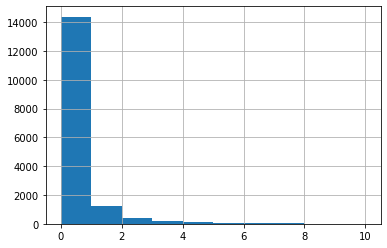

In [64]:
# построим диаграмму total_sales (диапазон до 10 млн копий)
data['total_sales'].hist(range = (0, 10));


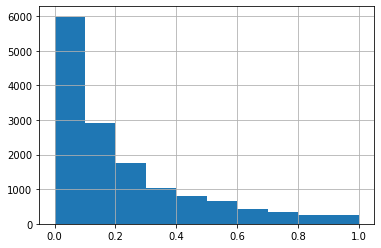

In [65]:
# построим диаграмму с Диапазоном до 1 млн копий. Гистограмма указала что среднее значение до 200 000 экз.
data['total_sales'].hist(range = (0, 1));

In [66]:
# выведем статистические данные за период до 1994 года
data.loc[data['year_of_release'] < 1994]['total_sales'].describe()  


count    365.000000
mean       1.589671
std        3.621390
min        0.010000
25%        0.290000
50%        0.730000
75%        1.520000
max       40.240000
Name: total_sales, dtype: float64

Данные за период до 1994 года различны, есть низкие значения и высокие. 
Но исходя из того, что интерес и требования к компьютерным играм за последние несколько лет сильно изменился, считаю нерелевантными данные до 2010 годов. 
Данные таблицы можно использовать для анализа жизненного цикла платформы, но для планирования рекламной кампании нужно брать период за 2-3 года, не больше.

### Анализ 'platform'

In [67]:
# проверим как менялись продажи по платформам

data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

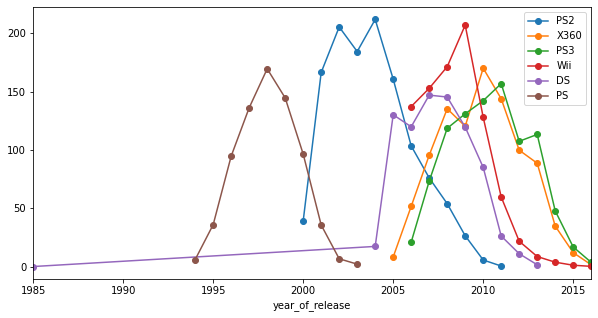

In [68]:
# определим топ-6 платформ за весь изучаемый период и выведем диаграмму
name = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for i in name:
    year_sales = data[(data['platform'] == i) & (data['year_of_release'] != 0)].groupby('year_of_release')['total_sales'].sum()
    year_sales.plot(x='year_of_release', style='o-', xlim=(1985, 2016), figsize=(10,5), legend=True, label = i)

   

Проанализировав диаграмму топ-6 платформ по уровню проданных копий, можно заключить следующее:
- топ-6 платформ появились только с 1994 года
- в основном каждая платформа приходила на смену другой, особенно это видно с 1994 по 2008. После лидирующие позиии начали занимать 4 платформы, скорее всего это связано с прогрессивным скачком данного направления в мире
- у всех платформ были максимальные уровни продажи (где-то наблюдается 2 пика активности) в середине их жизненного цикла, после их уровень продаж начинал сокращаться
- средний период активности платформы 5-7 лет, скорее всего это связано с упадком интереса к определенным играм. В связи с чем необходимо постоянно искать новые фичи  и направления в компьютерных играх, чтоб сохранить интерес пользователей к платформе
- у платформы DS в далеком 1985 году был выход на рынок с минимальным кол-вом продаж, возможно даже с 0, а потом он только вернулся на рынок в 2004 году. Но скорее всего это ошибка в данных, и  платформа начала свою деятельность только с 2004 года


In [71]:
# В связи с тем, что рынок и потребности постоянно меняются, для анализа и планирования рекламной кампании 
# необходимо использовать максимально свежые данные, например с 2014 по 2016 год включительно.

data = data.query('2014 <= year_of_release <= 2016')
data

# для анализа будет использовано 1689 позиции

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,неизвестно,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,неизвестно,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,неизвестно,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,неизвестно,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,неизвестно,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,неизвестно,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,неизвестно,0.01


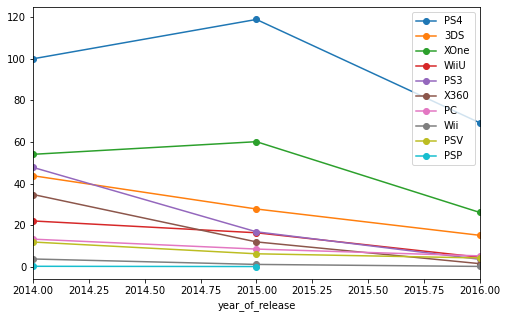

In [72]:
# выведем гистограммы по всем платформам по заданному периоду

for i in data['platform'].unique():
    year_sales = data[(data['platform'] == i)].groupby('year_of_release')['total_sales'].sum()
    year_sales.plot(x='year_of_release', style='o-', xlim=(2014, 2016), figsize=(8,5), legend=True, label = i)

По ранее выведенной диагремме за более дольший период, можно сказать с уверенностью, что жизненный цикл платформы, как и у Топ-6, тоже не большой 5-6 лет, есть исключения около 10 лет, но их суммарный уровень продаж никогда не переходил рубеж 40 млн копий  за год.
Среди молодых платформ  выделяется PS4, у которой наблюдается рост продаж и, с большой вероятностью, рост должен остаться стабильным еще несколько лет, если судить по среднему жизненному циклу платформ.
Также выделяется еще молодая платформа XOne, которая имет не такой значительный рост, как у PS4, но тем не менее есть предположения что и у нее в ближ.годы будет положительная динамика в росте.

In [73]:
# проверим как менялись продажи по платформам на отфильтрованном датасете (за 2014 по 2016года)

data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

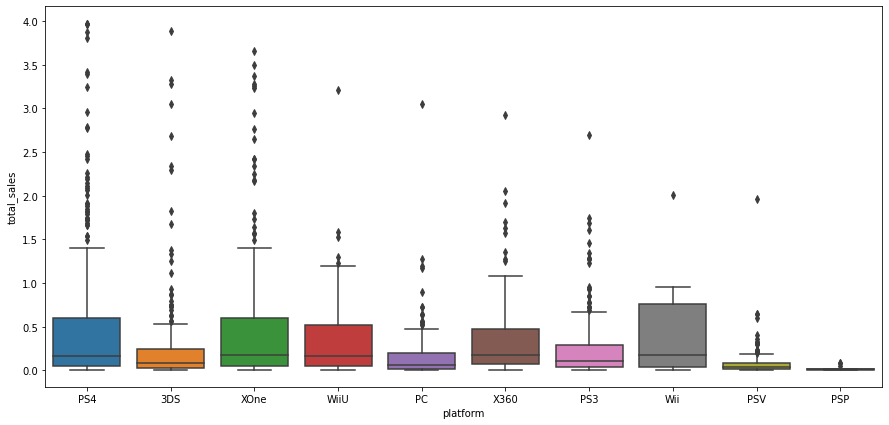

In [75]:
# построим boxplot. Необходимо было поставить фильтр на величину total_sales, т.к. из-за высоких выбросов диаграмма была нечитабельна

f, ax = plt.subplots(figsize=(15, 7))
fig = sns.boxplot(x='platform',   y='total_sales', data = data[data['total_sales'] < 4])

Проверим топ-6 лидеров по продажам ['PS4', 'XOne', '3DS', 'PS3', 'X360',   'WiiU']
- 'PS4, 'XOne' - их медианное значение не сильно, но выше других платформ, а так же они вышли в лидеры продаж, за счет частых высоких выбросов.
- WiiU, Wii -  их медианное значение на уровне с лидерами и верхняя граница усов находится достаточно высоко, но отсутствие частых крупных продаж (выбрасов) не позволили данным платформам выйтив в лидеры

### Анализ 'critic_score' и 'user_score'

critic_score 0.328105086966363
user_score -0.013070305002484585


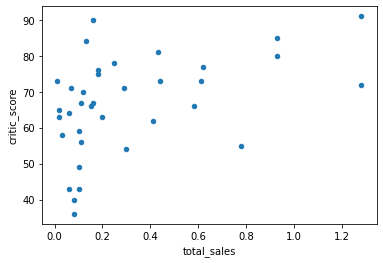

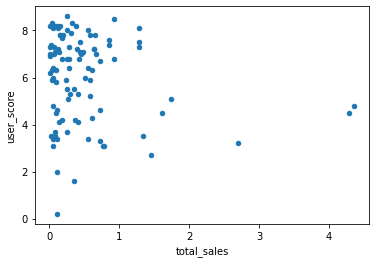

In [76]:
# посмотрим как влияют на продажи внутри одной платформы рейтинги пользователей и критиков
# построим диаграмму рассеивания и посчитаем корреляцию без нулевых значений, чтоб они не отразились на расчет коэфф. корреляции

corr_critic_score = data[data['critic_score'] != 0]
corr_user_score = data[data['user_score'] != 0]

print('critic_score', corr_critic_score['total_sales'].corr(corr_critic_score['critic_score']))
print('user_score', corr_user_score['total_sales'].corr(corr_user_score['user_score']))

corr_critic_score[corr_critic_score['platform']=='PS3'].plot(x = 'total_sales', y = 'critic_score', kind = 'scatter');
corr_user_score[corr_user_score['platform']=='PS3'].plot(x = 'total_sales', y = 'user_score', kind = 'scatter');

# судя по диаграмме рассеивания и коэфф. корреляции, critic_score влияет на кол-во покупок прямопропорционально, хоть зависимость не сильная, но она присутствует
# user_score - зависимость отсутсвует

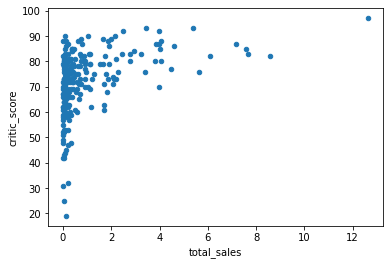

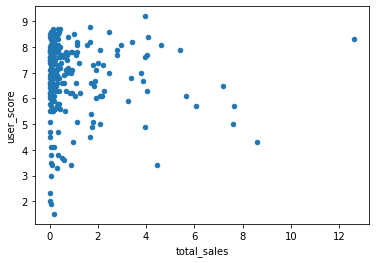

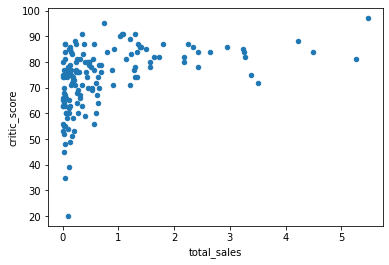

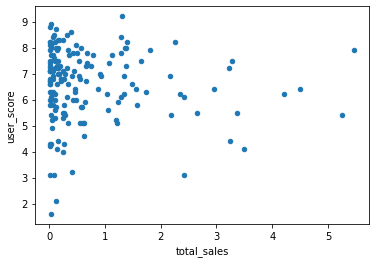

In [77]:
# проверим наше предположение на двух других платформах, построив диаграмму рассеивания

corr_critic_score[corr_critic_score['platform']=='PS4'].plot(x = 'total_sales', y = 'critic_score', kind = 'scatter');
corr_user_score[corr_user_score['platform']=='PS4'].plot(x = 'total_sales', y = 'user_score', kind = 'scatter');

corr_critic_score[corr_critic_score['platform']=='XOne'].plot(x = 'total_sales', y = 'critic_score', kind = 'scatter');
corr_user_score[corr_user_score['platform']=='XOne'].plot(x = 'total_sales', y = 'user_score', kind = 'scatter');

# ситуация повторилась, прямая зависимость имеется только у critic_score

### Анализ жанра

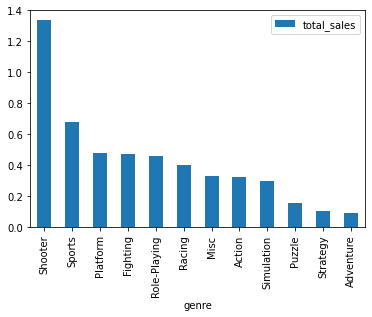

In [60]:
# построим диаграмму жанров по убыванию продаж для наглядности
data.pivot_table(index='genre', values='total_sales').sort_values(by='total_sales', ascending=False).plot(kind='bar');


In [61]:
# Выведем статистичекие данные для анализа жанра и отсортируем данные по значению mean

data.groupby('genre')['total_sales'].describe().sort_values(by ='mean', ascending=False)

# Shooter и Sports - хоть кол-во представленных игр данных жанров и не самое большое, средняя и медиана высокие, что говорит о наибольшей продаваемости игр именно этих жанра
# Малоприбыльные жанры Adventure, Strategy, Puzzle

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63
Sports,161.0,0.680000,1.239736,0.01,0.0600,0.180,0.6400,8.58
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Simulation,44.0,0.298409,0.646925,0.01,0.0200,0.100,0.3275,3.05


### Вывод 
-  для анализа было принято решение не использовать старые данные, по причине их неактуальности. Рынок компьютерных игр постоянно меняется, поэтому для планирования рекламной кампании было принято решение использовать относительно свежие данные, т.е. период с 2014 по 2016 года
- за изучаемый период имеется много платформ, но среди всех выделяются топ-6 платформ ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU'] с высоким уровнем продаж комп.игр. Средний жизненный цикл платформы 5-7 лет, на середине активности платформа, как правило, достигает своего пика (в некоторых случаях двойного пика), а затем идет на упад.
- среди Топ-6 платформ выделяются 2 молодые платформы ['PS4', 'XOne'], у которых наблюдается высокий уровень продаж, о чем сказали нам высокие средняя и медиана. И если исходить из полученных знаний о среднем жизненном цикле платформы, то с большой вероятностью ближайшие несколько лет у них будет рост продаж.
- построенные диаграммы рассеивания и коэф. корреляции показали слабую зависимость продаж от critic_score. Значение корреляции невелико, поэтому нельзя с уверенностью сказать об имеющейся зависимости. А вот об отсутствии зависимости продаж от rating мы можем смело заявить.
- выделяются самые прибыльные жанры Shooter, Sports  и малоприбыльные жанры  Adventure, Puzzle, Strategy

## Портрет пользователя каждого региона

### NA

In [78]:
# определим самые популярные платформы в Америке и их доли от основных продаж

sum_na = data['na_sales'].sum() # определим сумму всех продаж в регионе

data['corr_na'] = data['na_sales'] / sum_na # создадим колонку с долей от всех продаж
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,corr_na
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,неизвестно,14.63,0.021228
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,0.013941
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,неизвестно,11.68,0.015314
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,0.003943
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,неизвестно,7.98,0.010526


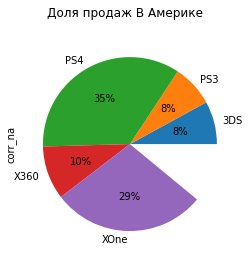

In [80]:
# определим Топ-5 платформ в Америке и построим круговую диаграмму по доле продаж (пустая зона - это все остальные платформы) 

na_platform = data.pivot_table(index=['platform'], values=['na_sales', 'corr_na'], aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5)
na_platform.pivot_table(index='platform', values='corr_na').plot(kind='pie', autopct='%1.0f%%', legend=False, subplots=True, title='Доля продаж В Америке');


genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Fighting        12.43
Racing           8.74
Platform         6.79
Adventure        5.64
Simulation       2.63
Strategy         0.98
Puzzle           0.65
Name: na_sales, dtype: float64

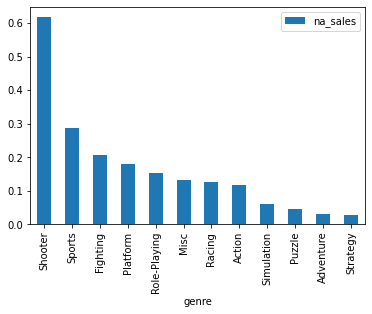

In [81]:
# определим популярные жанры для Америки
data.pivot_table(index='genre', values='na_sales').sort_values(by='na_sales', ascending=False).plot(kind='bar');
data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

# маловостребованные жанры Puzzle Strategy Adventure 
# популярные жанры в Америке Shooter Action  Sports Role-Playing Misc 

In [82]:
# определим влияет ли рейтинг ESRB на продажи в регионе
data.groupby('rating')['na_sales'].sum().sort_values()

#самые продаваемые возрастные категории М и Е

rating
E10+          33.23
T             38.95
E             50.74
неизвестно    64.72
M             96.42
Name: na_sales, dtype: float64

### EU

In [83]:
# определим самые популярные платформы в Европе и их доли от основных продаж

sum_eu = data['eu_sales'].sum() # определим сумму всех продаж в регионе
data['corr_eu'] = data['eu_sales'] / sum_eu # создадим колонку с долей от всех продаж
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,corr_na,corr_eu
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,неизвестно,14.63,0.021228,0.021649
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,0.013941,0.023312
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,неизвестно,11.68,0.015314,0.012893
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,0.003943,0.022610
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,неизвестно,7.98,0.010526,0.012893


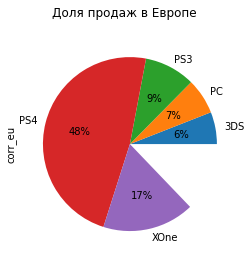

In [84]:
# определим Топ-5 платформ в Европе

eu_platform = data.pivot_table(index=['platform'], values=['eu_sales', 'corr_eu'], aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head(5)
eu_platform.pivot_table(index='platform', values='corr_eu').plot(kind='pie', autopct='%1.0f%%', legend=False, subplots=True, title='Доля продаж в Европе');


genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Misc            12.86
Simulation       7.30
Platform         6.80
Fighting         6.69
Adventure        6.49
Strategy         1.79
Puzzle           0.52
Name: eu_sales, dtype: float64

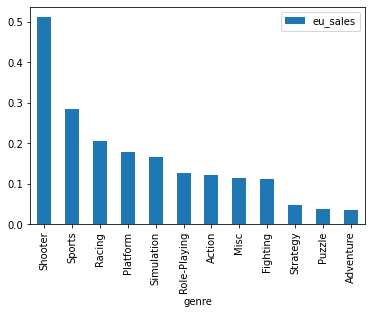

In [88]:
# определим популярные жанры в Европе
data.pivot_table(index='genre', values='eu_sales').sort_values(by='eu_sales', ascending=False).plot(kind='bar');
data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

# маловостребованные жанры  Adventure  Strategy Puzzle
# популярные жанры в Америке Action Shooter Sports Role-Playing Racing  Misc 

In [89]:
# определим влияет ли рейтинг ESRB на продажи в регионе
data.groupby('rating')['eu_sales'].sum().sort_values()

rating
E10+          26.16
T             34.07
E             58.06
неизвестно    58.95
M             93.44
Name: eu_sales, dtype: float64

### JP

In [90]:
# определим самые популярные платформы в Японии и их доли от основных продаж

sum_jp = data['jp_sales'].sum() # определим сумму всех продаж в регионе
data['corr_jp'] = data['jp_sales'] / sum_jp # создадим колонку с долей от всех продаж
data.head()
    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,corr_na,corr_eu,corr_jp
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,неизвестно,14.63,0.021228,0.021649,0.003867
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,0.013941,0.023312,0.004082
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,неизвестно,11.68,0.015314,0.012893,0.033301
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,0.003943,0.022610,0.000645
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,неизвестно,7.98,0.010526,0.012893,0.002363


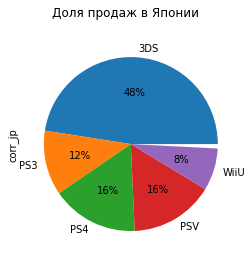

In [91]:
# определим Топ-5 платформ в Японии

jp_platform = data.pivot_table(index=['platform'], values=['jp_sales', 'corr_jp'], aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head(5)
jp_platform.pivot_table(index='platform', values='corr_jp').plot(kind='pie', autopct='%1.0f%%', legend=False, subplots=True, title='Доля продаж в Японии');



genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Adventure        3.60
Sports           3.26
Platform         2.69
Simulation       2.31
Racing           1.76
Strategy         0.95
Puzzle           0.93
Name: jp_sales, dtype: float64

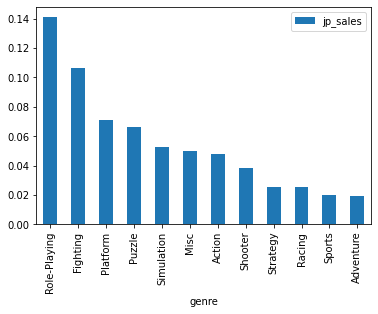

In [93]:
# определим популярные жанры в Японии

data.pivot_table(index='genre', values='jp_sales').sort_values(by='jp_sales', ascending=False).plot(kind='bar');
data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# маловостребованные жанры  Adventure  Strategy Puzzle
# популярные жанры в Японии Role-Playing Action Fighting 

In [94]:
# определим влияет ли рейтинг ESRB на продажи в регионе
data.groupby('rating')['jp_sales'].sum().sort_values()

rating
E10+           4.46
M              8.01
E              8.94
T             14.78
неизвестно    56.90
Name: jp_sales, dtype: float64

### Другие регионы

In [95]:
# определим самые популярные платформы в Других регионах и их доли от основных продаж

sum_other = data['other_sales'].sum() # определим сумму всех продаж в регионе
data['corr_other'] = data['other_sales'] / sum_other # создадим колонку с долей от всех продаж
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,corr_na,corr_eu,corr_jp,corr_other
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,неизвестно,14.63,0.021228,0.021649,0.003867,0.029160
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,0.013941,0.023312,0.004082,0.024136
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,неизвестно,11.68,0.015314,0.012893,0.033301,0.009066
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,0.003943,0.022610,0.000645,0.015682
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,неизвестно,7.98,0.010526,0.012893,0.002363,0.015682


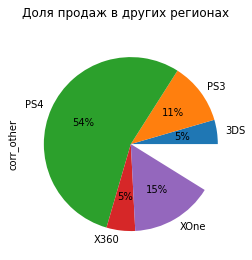

In [97]:
# определим Топ-5 платформ в других странах

other_platform = data.pivot_table(index=['platform'], values=['other_sales', 'corr_other'], aggfunc = 'sum').sort_values(by='other_sales', ascending=False).head(5)
other_platform.pivot_table(index='platform', values='corr_other').plot(kind='pie', autopct='%1.0f%%', legend=False, subplots=True, title='Доля продаж в других регионах');

genre
Action          22.57
Shooter         21.53
Sports          14.36
Role-Playing     8.64
Misc             4.03
Racing           2.89
Fighting         2.73
Adventure        1.82
Platform         1.81
Simulation       0.89
Strategy         0.24
Puzzle           0.11
Name: other_sales, dtype: float64

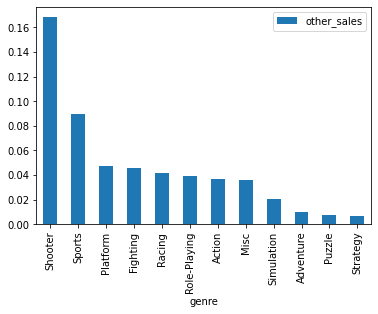

In [99]:
# определим популярные жанры в Других странах

data.pivot_table(index='genre', values='other_sales').sort_values(by='other_sales', ascending=False).plot(kind='bar');
data.groupby('genre')['other_sales'].sum().sort_values(ascending=False)

# маловостребованные жанры  Adventure  Strategy Puzzle
# популярные жанры в Америке  Shooter Sports Action Role-Playing Misc 

In [100]:
# определим влияет ли рейтинг ESRB на продажи в регионе
data.groupby('rating')['other_sales'].sum().sort_values()

rating
E10+           7.83
T             11.33
E             15.39
неизвестно    18.40
M             28.67
Name: other_sales, dtype: float64

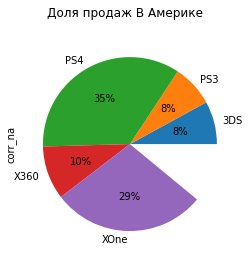

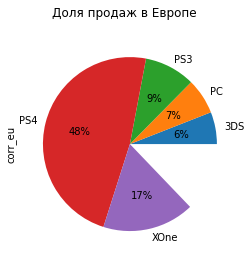

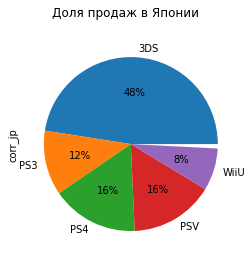

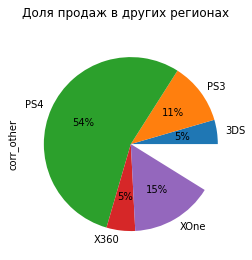

In [101]:
# выведем платформы Топ-5 всех регионов вместе для сравнения

na_platform.pivot_table(index='platform', values='corr_na').plot(kind='pie', autopct='%1.0f%%', legend=False, subplots=True, title='Доля продаж В Америке');
eu_platform.pivot_table(index='platform', values='corr_eu').plot(kind='pie', autopct='%1.0f%%', legend=False, subplots=True, title='Доля продаж в Европе');
jp_platform.pivot_table(index='platform', values='corr_jp').plot(kind='pie', autopct='%1.0f%%', legend=False, subplots=True, title='Доля продаж в Японии');
other_platform.pivot_table(index='platform', values='corr_other').plot(kind='pie', autopct='%1.0f%%', legend=False, subplots=True, title='Доля продаж в других регионах');

# во всех регионах пользуется популярностью платформа PS4 (в сред 50% рынка региона по продажам) и XOne (в сред 20% рынка региона по продажам, кроме Японии. 
# В Японии же преобладает платформа 3DS (японская платформа), в то время как в др. регонах она занимает не больше 6-7 % рынка

### Вывод
Произведенный анализ показал, что портрет потребителя отличается в зависимости от региона.
Самые активно играющие региона с 2014 года  Северная Америка и Европа. 
Платформы во всех регионах практически используются одинаковые, кроме Японии. Скорее всего в Японии большую популярность имеют собственные платформы. Во всех регионах, кроме Японии, пользуется популярностью платформа PS4 (в сред 50% рынка региона по продажам) и XOne (в сред 20% рынка региона по продажам).
Пятерка лидеров в регионах занимает практически 85-90% локального рынка. 
Популярность жанров в регионах практически одинаковая Action Shooter Sports, только в Японии огромную популярность имеет направление Role-Playing. Менее популярные жанры у всех одинаковые Adventure  Strategy Puzzle. 
Самые популярные актегории в компьютерных играх - М (Для взрослых), Е (Для всех).

## Проверка гипотез

In [102]:
### Гипотеза №1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [103]:
#проверим средние пользовательские рейтинги платформ Xbox One и PC

mean_user_score_XOne = data.query('platform == "XOne"')
print('mean_user_score_XOne', mean_user_score_XOne['user_score'].mean())

mean_user_score_PC = data.query('platform == "PC"')
print('mean_user_score_PC', mean_user_score_PC['user_score'].mean())

# по предварительным данным средние разные, но проверим этот факт на тетсе

mean_user_score_XOne 4.772368421052631
mean_user_score_PC 5.088741721854304


Эта гипотеза о равенстве средних двух генеральных совокупностей. 
У нас выборка значений разной длины, поэтому указываем в параметре equel_var=False, чтоб тест посчитал дисперсии по отдельноости.
За нулевую гипотезу принимаем то, что между платформами нет отличий, т.е. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза - соот-но наоборот, Средние пользовательские рейтинги платформ Xbox One и PC разные

In [104]:
user_score_XOne = data[data['platform'] == 'XOne']
user_score_XOne = data['user_score']
user_score_PC = data[data['platform'] == 'PC']
user_score_PC = data['user_score']

alpha = 0.05 # задаем значение уровня значимости

res = st.ttest_ind(user_score_XOne, user_score_PC, equal_var=False)

print(res.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средний пользовательский рейтинг у платформ Xbox One и PC разный')
else:
    print('Принимаем нулевую гипотезу. Средний пользовательский рейтинг у платформ Xbox One и PC одинаковый')

1.0
Принимаем нулевую гипотезу. Средний пользовательский рейтинг у платформ Xbox One и PC одинаковый


In [105]:
### Гипотеза №2 Средние пользовательские рейтинги жанров Action и Sports разные

In [106]:
#проверим средние пользовательские рейтинги жанров Action и Sports

mean_user_score_Action = data.query('genre == "Action"')
print('mean_user_score_Action', mean_user_score_Action['user_score'].mean())

mean_user_score_Sports = data.query('genre == "Sports"')
print('mean_user_score_Sports', mean_user_score_Sports['user_score'].mean())

# по предварительным данным средние разные, но проверим этот факт на тетсе

mean_user_score_Action 3.2437802907915994
mean_user_score_Sports 4.121739130434783


In [107]:
# все по аналогии с гипотезой 1

user_score_Action = data[data['genre'] == 'Action']
user_score_Action = data['user_score']
user_score_Sports = data[data['genre'] == 'Sports']
user_score_Sports = data['user_score']

alpha = 0.05 # задаем значение уровня значимости

res = st.ttest_ind(user_score_Action, user_score_Sports, equal_var=False)

print(res.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средний пользовательский рейтинг у жанров Action и Sports разный')
else:
    print('Принимаем нулевую гипотезу. Средний пользовательский рейтинг у жанров Action и Sport одинаковый')

1.0
Принимаем нулевую гипотезу. Средний пользовательский рейтинг у жанров Action и Sport одинаковый


## Вывод
Для анализа планирования рекламной кампании в 2017 году для организации «Стримчик» использовались данные из открытых источников за период с 1980 по 2016 года.

В исходных данных имелось большое кол-во пропусков в рейтингах, которые в последствии были заменены на 0, для возможности проведения в дальнейшем анализа (или заполнены словом 'неизвестно' в колонке 'rating'). Практически 90% пропусков совпадают в 3-х колонках (колонки с рейтингами), поэтому предположительно это техническая проблема, в ходе которой была потеряна часть информации (как правило, многие потери пришлись на период 1995-2011гг). Также категория tbd (отметка неясностей или пропусков) в рейтинге user_score (около 15%) могла возникнуть в следствии некорректного ввода оценки пользователем/геймером. Также в данных пришлось заменить тип данных в рейтингах для возможности проведения анализа.

Для понимания жизненного цикла платформ были проанализированы платформы за весь исходный период. Данный анализ позволил понять, что средний жизненный цикл платформы 5-7 лет. На середине активности платформа, как правило, достигает своего пика (в некоторых случаях двойного пика), а затем идет на спад.
Далее для анализа было принято решение не использовать старые данные, по причине их неактуальности. Рынок компьютерных игр постоянно меняется, поэтому для планирования рекламной кампании было принято решение использовать свежие данные, т.е. период с 2014 по 2016 года.

На успех игры влияют платформы, жанры, возрастные категории, регионы. Никакого влияния на успех игры не оказывают рейтинги.
- **Платформа**
За последние 3 года изучаемого периода имеется много платформ, но среди всех выделяются топ-6 платформ ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU'] с высоким уровнем продаж комп.игр. 
Для планирования рекламной компании рекомендуется обратить внимание на молодые платформы ['PS4', 'XOne']. Уровень продаж достаточно стабильный, о чем говорят нам высокие показатели средней и медианы. Жизненный цикл платформы еще небольшой, поэтому имеются основания предполагать, что платформа находится на этапе развития и в 2017 году так же будет наблюдаться стабильный рост продаж.
- **Жанр и возрастная категория**
При выборе жанра рекомендуется использовать жанры  Action, Shooter, Sports, так как эти жанры оказались самыми продаваемыми.
Следует обратить внимание на игры возрастной категории M (Для взрослых) и Е (Для всех), так как именно эти категории являются самыми востребованными.
Малопопулярные игры жанра Adventure, Puzzle, Strategy и возрастной категории EC (Для детей младшего возраста), E10+ (Для всех от 10 лет и старше): 
- **Регион**
Во всех регионах практически похожая ситуация с популярностью жанров, платформ, возрастной категорией, кроме Японии. 
Если рекламная компания будет направлена локально, пусть то Япония или другая развитая страна, необходимо обязательно провести более глубокий анализ предпочтений конкретного региона.



